### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 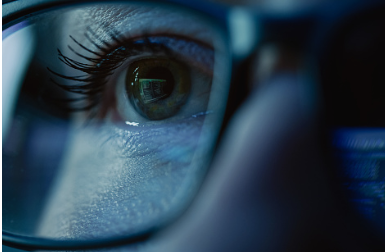 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.

In [1]:
#Neural Network Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

#Image plotting Libraries
import cv2
import os
import matplotlib.pyplot as plt


Images with Glasses:


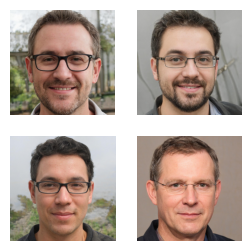

Images without Glasses:


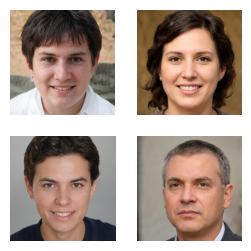

In [2]:
# Directory paths for both classes
glasses = r"C:\Users\ashmi\Data Science\Glasses\glasses_3\glasses\glasses"
no_glasses = r"C:\Users\ashmi\Data Science\Glasses\glasses_3\glasses\no_glasses"

# Function to load and display images
def display_images(directory):
    fig = plt.figure(figsize=(3,3 ))
    images = os.listdir(directory)[:4]  # Displaying the first 4 images
    for i, img_name in enumerate(images):
        img_path = os.path.join(directory, img_name)
        image = cv2.imread(img_path)  # Read the image using OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        ax = fig.add_subplot(2, 2, i + 1)
        ax.imshow(image)
        ax.axis('off')
    plt.show()

# Display images from 'with_glasses' directory
print("Images with Glasses:")
display_images(glasses)

# Display images from 'without_glasses' directory
print("Images without Glasses:")
display_images(no_glasses)

In [3]:
#Seperating the training and testing data
#Saving the Directory Path
train_dir=r"C:\Users\ashmi\Data Science\Glasses\train"
test_dir=r"C:\Users\ashmi\Data Science\Glasses\test"

In [18]:
# Setting some values to use throughout the modelling process
img_width, img_height = 150,150 #Resize the images
input_shape = (img_width, img_height, 3) #Input shape for first layer of Neural Network
batch_size = 4

- Batch size depends on the dataset size and the computational powers
- Since we have smaller dataset, we are going with small batch size ,generally 32-64 is preferred.

## Data Augmentation 

- The primary purpose of data augmentation is to artificially increase the diversity of your training dataset by applying various transformations to the existing images

In [19]:
#Creating an ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Augmenting training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  # for binary classification
)

Found 70 images belonging to 2 classes.


- Data Augmentation: Applies random transformations to create variations in the training data:
    - Shear_range: Distorts images by shifting pixels horizontally or vertically.
    - Zoom_range: Randomly zooms in or out of images.
    - Horizontal_flip: Randomly flips images horizontally.

In [20]:
test_datagen = ImageDataGenerator(rescale=1/255.0)

# Load and augment validation data
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  # for binary classification
)


Found 16 images belonging to 2 classes.


- No other augmentations: Unlike the training generator, it's crucial not to apply data augmentation techniques to validation data. 
- Validation data should reflect real-world examples without artificial distortions to accurately assess model performance.

## Convolutional Neural Network Building

In [27]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=input_shape, activation='relu')) #Convolutional layer with 16 filters of size 3x3.
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu')) #Convolutional layer with 32 filters of size 3x3.
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))  # 1 neuron for binary classification

- The model has a basic CNN architecture with two convolutional layers, followed by dense layers for classification.
- Convolutional layers extract features from images, while max pooling reduces dimensionality.
- Flattening prepares data for dense layers, which perform classification.
- Dropout helps prevent overfitting.
- The sigmoid activation in the output layer is suitable for binary classification.

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 41472)             0         
                                                                 
 dense_7 (Dense)             (None, 32)               

- Early stopping is incorporated to potentially prevent overfitting and save training time.
- Creating an EarlyStopping callback to monitor validation loss and potentially stop training early if it doesn't improve for a certain number of epochs.

In [29]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Early Stopping condition on validation loss
early_stop = EarlyStopping(monitor='val_loss',patience=2)

history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stop]
)


Epoch 1/20
17/17 [==============================] - 2s 72ms/step - loss: 0.9284 - accuracy: 0.5455 - val_loss: 0.6848 - val_accuracy: 0.5625
Epoch 2/20
17/17 [==============================] - 1s 63ms/step - loss: 0.6321 - accuracy: 0.6970 - val_loss: 0.7125 - val_accuracy: 0.5625
Epoch 3/20
17/17 [==============================] - 1s 59ms/step - loss: 0.5811 - accuracy: 0.7576 - val_loss: 0.6841 - val_accuracy: 0.5625
Epoch 4/20
17/17 [==============================] - 1s 60ms/step - loss: 0.5826 - accuracy: 0.7273 - val_loss: 0.7954 - val_accuracy: 0.5625
Epoch 5/20
17/17 [==============================] - 1s 61ms/step - loss: 0.5870 - accuracy: 0.7121 - val_loss: 0.6451 - val_accuracy: 0.5625
Epoch 6/20
17/17 [==============================] - 1s 63ms/step - loss: 0.5382 - accuracy: 0.7424 - val_loss: 0.6191 - val_accuracy: 0.5625
Epoch 7/20
17/17 [==============================] - 1s 58ms/step - loss: 0.4375 - accuracy: 0.7121 - val_loss: 0.5245 - val_accuracy: 0.5625
Epoch 8/20
17

- The history object holds valuable information for evaluating model performance and training progress.

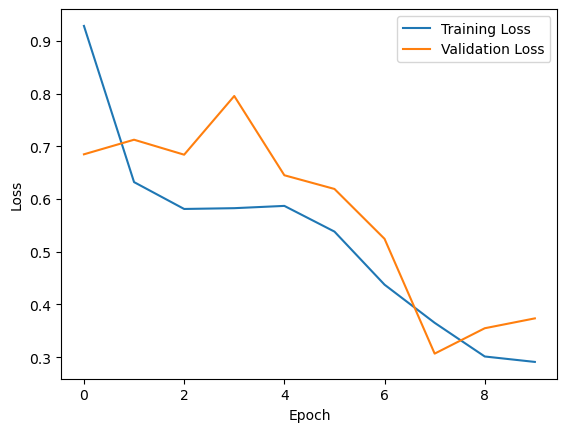

In [30]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


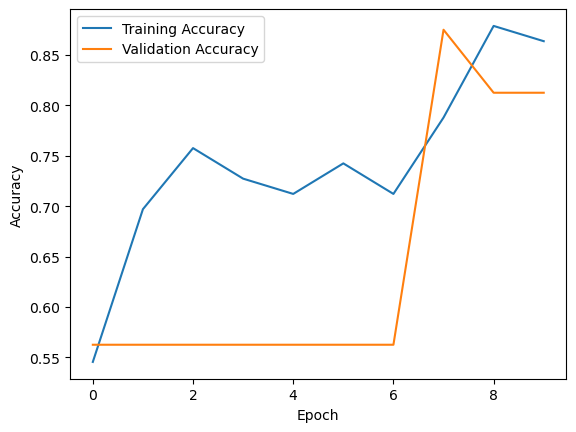

In [31]:
#Plotting Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Conclusion 

- We have created a very basic CNN for image classification purpose , and achieved an accuracy of 81% ,slightly overfitting.
- Since Neural Networks relies on data , so to get a more generalised model we need more images.
- We can apply various techniques to avoid overfitting in neural networks such as batchnormalization, adding dropout layers.